# Module 1 Auto - Differentiation
[Repositorio de Github](https://github.com/jbardalesr/MinitorchTutorial/tree/main/Module-1)

In [ ]:
from __future__ import annotations

from numpy.lib.function_base import copy
from minitorch.autodiff import Context, FunctionBase, Variable, History
from . import operators
import numpy as np
from collections.abc import Callable

# Task
## Task 1.1: Numerical Derivatives

In [ ]:
def central_difference(f: Callable[[tuple[float, ...]], float], *vals: float, arg=0, epsilon=1e-6):
    r"""
    Computes an approximation to the derivative of `f` with respect to one arg.
    Args:
       f : arbitrary function from n-scalar args to one value
       *vals (floats): n-float values :math:`x_0 \ldots x_{n-1}`
       arg (int): the number :math:`i` of the arg to compute the derivative
       epsilon (float): a small constant

    Returns:
       float : An approximation of :math:`f'_i(x_0, \ldots, x_{n-1})`
    """
    valsh = np.copy(vals)*1.0
    vals_h = np.copy(vals)*1.0

    valsh[arg] = valsh[arg] + epsilon
    vals_h[arg] = vals_h[arg] - epsilon

    # TODO: Implement for Task 1.1.
    return (f(*valsh) - f(*vals_h)) / (2 * epsilon)

## Task 1.2 and 1.4 Scalar Forward and Backward

In [ ]:
class Scalar(Variable):
    """
    A reimplementation of scalar values for autodifferentiation
    tracking.  Scalar Variables behave as close as possible to standard
    Python numbers while also tracking the operations that led to the
    number's creation. They can only be manipulated by
    :class:`ScalarFunction`.

    Attributes:
        data (float): The wrapped scalar value.

    """

    def __add__(self, b):
        # TODO: Implement for Task 1.2.
        return Add.apply(self, b)

    def __lt__(self, b):
        # TODO: Implement for Task 1.2.
        return LT.apply(self, b)

    def __gt__(self, b):
        # TODO: Implement for Task 1.2.
        return Neg.apply(LT.apply(Neg.apply(self), Neg.apply(b)))

    def __sub__(self, b):
        # TODO: Implement for Task 1.2.
        return Add.apply(self, Neg.apply(b))

    def __neg__(self):
        # TODO: Implement for Task 1.2.
        return Neg.apply(self)

    def log(self):
        # TODO: Implement for Task 1.2.
        return Log.apply(self)

    def exp(self):
        # TODO: Implement for Task 1.2.
        return Exp.apply(self)

    def sigmoid(self):
        # TODO: Implement for Task 1.2.
        return Sigmoid.apply(self)

    def relu(self):
        # TODO: Implement for Task 1.2.
        return ReLU.apply(self)

    def get_data(self):
        # The wrap value is stored in data attribute
        return self.data

# To implement.


class Mul(ScalarFunction):
    "Multiplication function"

    @staticmethod
    def forward(ctx: Context, a: float, b: float) -> float:
        # TODO: Implement for Task 1.2.
        ctx.save_for_backward((a, b))
        return operators.mul(a, b)

    @staticmethod
    def backward(ctx: Context, d_output: float) -> tuple[float]:
        # TODO: Implement for Task 1.4.
        a, b = ctx.saved_values
        return operators.mul(b, d_output), operators.mul(a, d_output)


class Inv(ScalarFunction):
    "Inverse function"

    @staticmethod
    def forward(ctx: Context, a: float) -> float:
        # TODO: Implement for Task 1.2.
        ctx.save_for_backward(a)
        return operators.inv(a)

    @staticmethod
    def backward(ctx: Context, d_output: float) -> float:
        # TODO: Implement for Task 1.4.
        a = ctx.saved_values
        return operators.inv_back(a, d_output)


class Neg(ScalarFunction):
    "Negation function"

    @staticmethod
    def forward(ctx: Context, a: float) -> float:
        # TODO: Implement for Task 1.2.
        return operators.neg(a)

    @staticmethod
    def backward(ctx: Context, d_output: float) -> float:
        # TODO: Implement for Task 1.4.
        return operators.neg(d_output)


class Sigmoid(ScalarFunction):
    "Sigmoid function"

    @staticmethod
    def forward(ctx: Context, a: float) -> float:
        # TODO: Implement for Task 1.2.
        ctx.save_for_backward(a)
        return operators.sigmoid(a)

    @staticmethod
    def backward(ctx: Context, d_output: float) -> float:
        # TODO: Implement for Task 1.4.
        a = ctx.saved_values
        return operators.sigmoid(a) * (1 - operators.sigmoid(a)) * d_output


class ReLU(ScalarFunction):
    "ReLU function"

    @staticmethod
    def forward(ctx: Context, a: float) -> float:
        # TODO: Implement for Task 1.2.
        ctx.save_for_backward(a)
        return operators.relu(a)

    @staticmethod
    def backward(ctx: Context, d_output: float) -> float:
        # TODO: Implement for Task 1.4.
        a = ctx.saved_values
        return operators.relu_back(a, d_output)


class Exp(ScalarFunction):
    "Exp function"

    @staticmethod
    def forward(ctx: Context, a: float):
        # TODO: Implement for Task 1.2.
        ctx.save_for_backward(a)
        return operators.exp(a)

    @staticmethod
    def backward(ctx: Context, d_output: float):
        # TODO: Implement for Task 1.4.
        a = ctx.saved_values
        return operators.mul(d_output, operators.exp(a))


## Task 1.3: Chain Rule

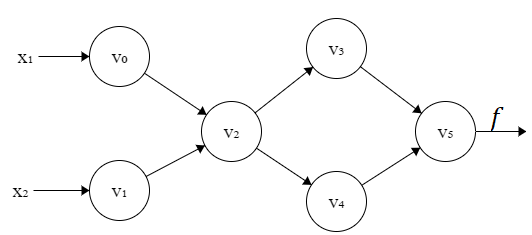

$f(x_1, x_2) = \log(x_1x_2) + \exp(x_1x_2)$ 
\begin{align}
v_0 &= x_1          & \overline{v}_5 &= 1\\
v_1 &= x_2          & \overline{v}_4 &= \frac{\partial v_5}{\partial v_4} \overline{v}_5 = \overline{v}_5 \\
v_2 &= v_0 v_1      & \overline{v}_3 &= \frac{\partial v_5}{\partial v_3} \overline{v}_5 =  \overline{v}_5 \\
v_3 &= \log(v_2)    &   \overline{v}_2 &= \frac{\partial v_3}{\partial v_2}\overline{v}_3 + \frac{\partial v_4}{\partial v_2}\overline{v}_4 = \frac{1}{v_2}\overline{v}_3 + \exp{(v_2)} \overline{v}_4\\
v_4 &= \exp(v_2)    & \overline{v}_1 &= \frac{\partial v_2}{\partial v_1}\overline{v}_2 = v_0 \overline{v}_2 \Rightarrow \text{ Derivada respecto de $x_2$}\\
v_5 &= v_3 + v_4    & \overline{v}_0 &= \frac{\partial v_1}{\partial v_0}\overline{v}_1 = v_1 \overline{v}_2 \Rightarrow \text{ Derivada respecto de $x_1$}
\end{align}

In [ ]:
@classmethod
def chain_rule(cls, ctx: Context, inputs: tuple[Variable], d_output: float) -> list[VariableWithDeriv]:
    """
    Implement the derivative chain-rule.

    Args:
        cls (:class:`FunctionBase`): The Function
        ctx (:class:`Context`) : The context from running forward
        inputs (list of args) : The args that were passed to :func:`FunctionBase.apply` (e.g. :math:`x, y`)
        d_output (number) : The `d_output` value in the chain rule.

    Returns:
        list of :class:`VariableWithDeriv`: A list of non-constant variables with their derivatives
        (see `is_constant` to remove unneeded variables)

    """
    # TODO: Implement for Task 1.3.

    # Ejemplo: cls Add, ctx almacena v3 y v4 para el backward, adjoint_v5 = d_output = 1
    # v5(v3, v4) = v3 + v4
    # adjoint_v4 = dv5/dv4 * adjoint_v5
    # adjoint_v3 = dv5/dv3 * adjoint_v5

    # adjoint_v = (adjoint_v3, adjoint_v4)
    adjoint_v: float | tuple[float] = cls.backward(ctx, d_output)

    # si fuera un solo numero lo convertimos a tupla para ponerlo junto con el zip
    adjoint_v = wrap_tuple(adjoint_v)

    # VariableWithDeriv(vi, adjoint_vi)
    v_adjoint_v: list[VariableWithDeriv] = []
    for vi, adjoint_vi in zip(inputs, adjoint_v):
        if not is_constant(vi):
            v_adjoint_v.append(VariableWithDeriv(vi, adjoint_vi))
    return v_adjoint_v

## Task 1.4: Backpropagation
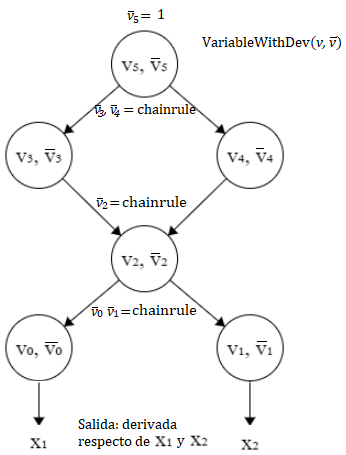

In [ ]:
def backpropagate(final_variable_with_deriv: VariableWithDeriv):
    """
    Runs a breadth-first search on the computation graph in order to
    backpropagate derivatives to the leaves.

    See :doc:`backpropagate` for details on the algorithm

    Args:
       final_variable_with_deriv (:class:`VariableWithDeriv`): The final variable
           and its derivative that we want to propagate backward to the leaves.
    """
    # TODO: Implement for Task 1.4.

    # Step 0) Initialize a queue with the final Variable-derivative
    queue: list[VariableWithDeriv] = [final_variable_with_deriv]
    # al comienzo es vn = f, adjoint_vn = 1
    while len(queue) > 0:
        # Step 1) While the queue is not empty, pull a Variable+derivative from the queue
        v_adjoint_v = queue.pop(0)
        vi, adjoint_vi = v_adjoint_v.variable, v_adjoint_v.deriv

        if is_leaf(vi):
            # Step 1.a) if the Variable is a leaf, add its final derivative (_add_deriv) and loop to (1)
            vi._add_deriv(adjoint_vi)
        else:
            # Step 1.b) if the Variable is not a leaf,
            # 1) call .chain_rule on the last function that created it with derivative as d_out
            v_adjoint_v_list = vi.history.last_fn.chain_rule(ctx=vi.history.ctx,
                                                             inputs=vi.history.inputs,
                                                             d_output=adjoint_vi)
            # 2) loop through all the Variables+derivative produced by the chain rule (removing constants)
            for vi_adjoint_vi in v_adjoint_v_list:
                vi, adjoint_vi = vi_adjoint_vi.variable, vi_adjoint_vi.deriv
                if not is_constant(vi):
                    # 4) add to the queue
                    queue.append(vi_adjoint_vi)

## Task 1.5: Training

In [ ]:
PTS = 50
DATASET = datasets.Simple(PTS, vis=True)
HIDDEN = 2
RATE = 0.5

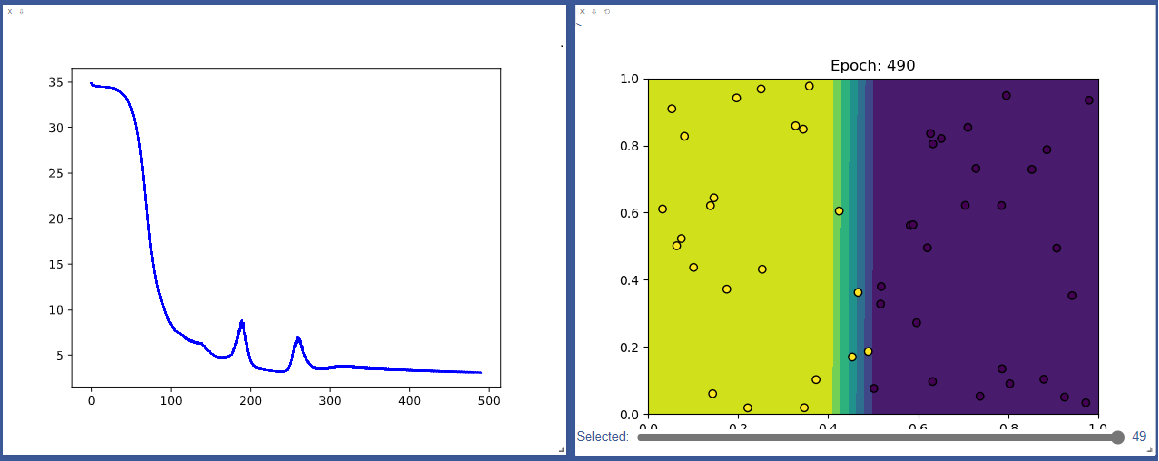

In [ ]:
PTS = 50
DATASET = datasets.Xor(PTS, vis=True)
HIDDEN = 10
RATE = 0.5

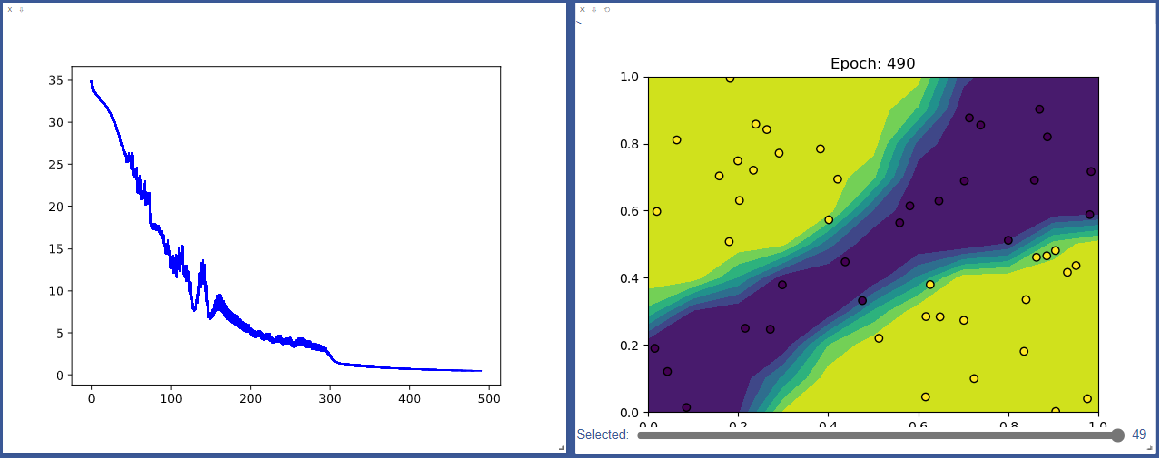

# Test

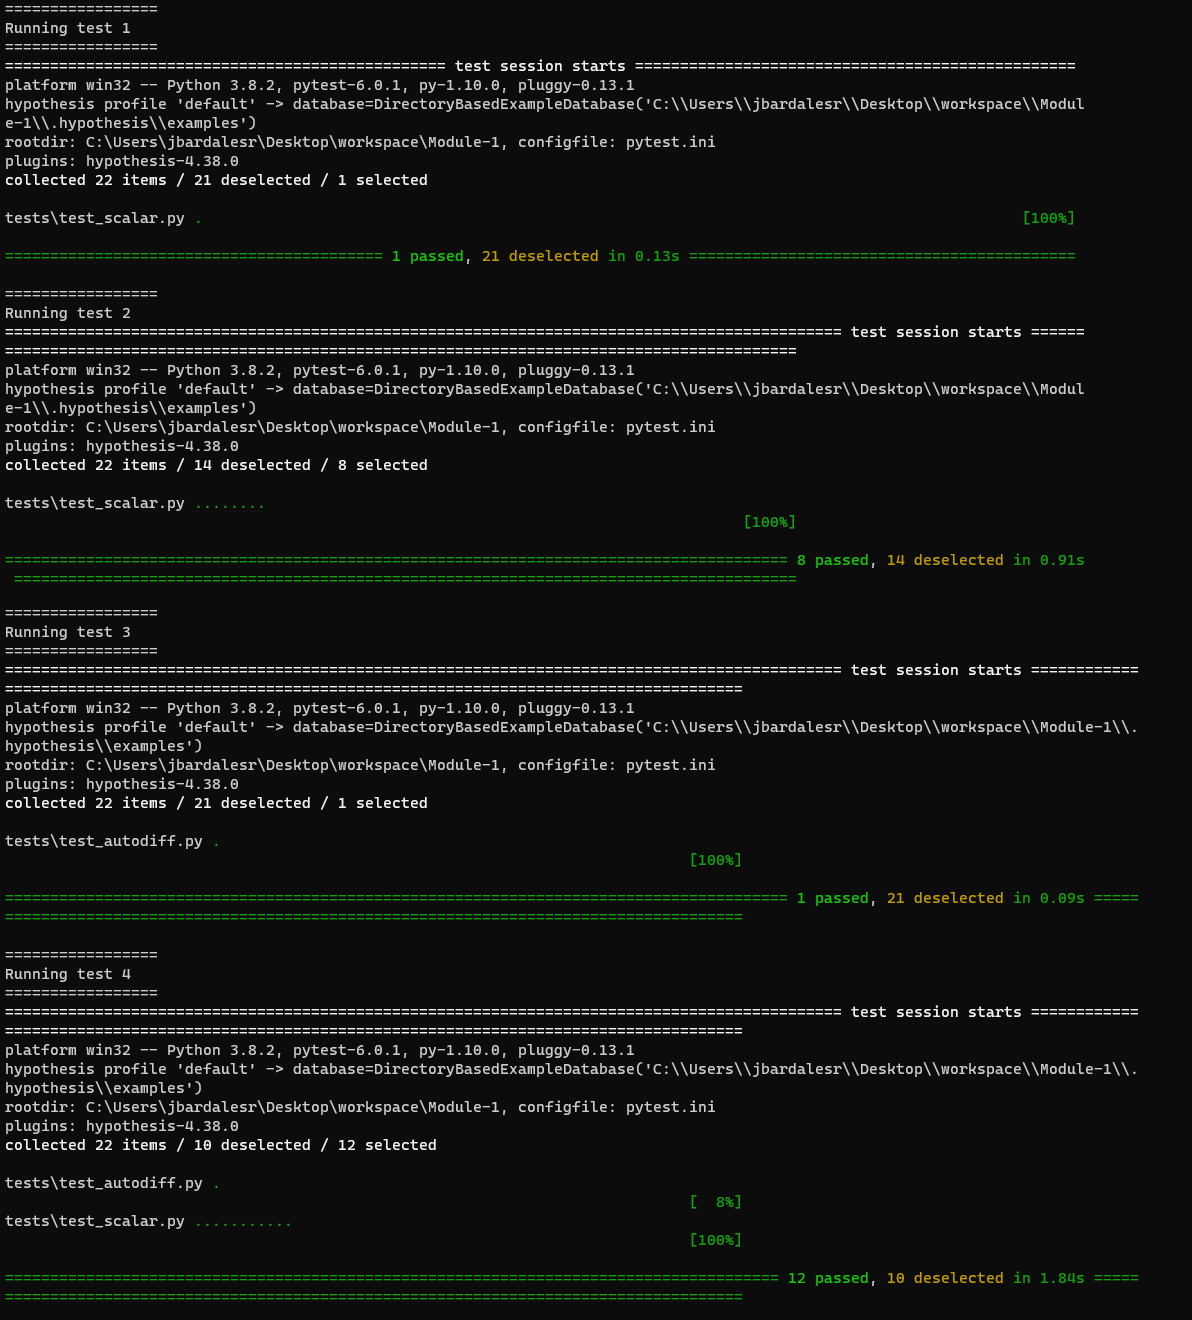